In [ ]:
pip install pycaret

In [4]:
from pycaret.utils import enable_colab
enable_colab()

Colab mode enabled.


In [5]:
from pycaret.datasets import get_data
dataset= get_data('diamond')

,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price
0,1.10,Ideal,H,SI1,VG,EX,GIA,5169
1,0.83,Ideal,H,VS1,ID,ID,AGSL,3470
2,0.85,Ideal,H,SI1,EX,EX,GIA,3183
3,0.91,Ideal,E,SI1,VG,VG,GIA,4370
4,0.83,Ideal,G,SI1,EX,EX,GIA,3171


In [6]:
data= dataset.sample(frac=0.9, random_state=789)
data_unseen = dataset.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)


In [7]:
from pycaret.regression import *
exp1=setup(data=data, target='Price', session_id=123)

,Description,Value
0,session_id,123
1,Target,Price
2,Original Data,"(5400, 8)"
3,Missing Values,False
4,Numeric Features,1
5,Categorical Features,6
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(3779, 28)"


In [8]:
best = compare_models( sort="R2")

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,7.416034e+02,2.272012e+06,1.464039e+03,9.762000e-01,0.0798,5.940000e-02,1.403
gbr,Gradient Boosting Regressor,8.761989e+02,2.912544e+06,1.683846e+03,9.696000e-01,0.0981,7.460000e-02,0.366
rf,Random Forest Regressor,7.816115e+02,2.944934e+06,1.688774e+03,9.689000e-01,0.0814,5.960000e-02,0.960
lightgbm,Light Gradient Boosting Machine,7.557239e+02,3.030484e+06,1.702937e+03,9.681000e-01,0.0781,5.700000e-02,0.077
dt,Decision Tree Regressor,9.740953e+02,4.636585e+06,2.092204e+03,9.506000e-01,0.1060,7.620000e-02,0.022
ridge,Ridge Regression,2.321813e+03,1.296115e+07,3.579766e+03,8.656000e-01,0.6274,2.736000e-01,0.015
lasso,Lasso Regression,2.321421e+03,1.303752e+07,3.595585e+03,8.644000e-01,0.6328,2.730000e-01,0.022
br,Bayesian Ridge,2.324424e+03,1.305368e+07,3.597294e+03,8.643000e-01,0.6294,2.736000e-01,0.012
llar,Lasso Least Angle Regression,2.267767e+03,1.306782e+07,3.599265e+03,8.642000e-01,0.6273,2.598000e-01,0.013
lr,Linear Regression,2.351868e+03,1.316566e+07,3.613532e+03,8.630000e-01,0.6376,2.783000e-01,0.226


In [9]:
et = create_model('et')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,702.3652,1.311778e+06,1145.3287,0.9864,0.0731,0.0583
1,781.9753,2.205157e+06,1484.9770,0.9777,0.0853,0.0621
2,732.9597,1.806236e+06,1343.9626,0.9762,0.0785,0.0608
3,877.7097,2.718010e+06,1648.6388,0.9779,0.0923,0.0654
4,794.0851,6.067024e+06,2463.1330,0.9351,0.0842,0.0600
5,727.8294,1.612669e+06,1269.9092,0.9831,0.0735,0.0549
6,770.4601,1.977799e+06,1406.3425,0.9793,0.0829,0.0625
7,690.3712,1.485827e+06,1218.9449,0.9835,0.0777,0.0583
8,675.9960,1.751966e+06,1323.6185,0.9818,0.0760,0.0557


In [10]:
tuned_et = tune_model(et)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,874.9854,2.196143e+06,1481.9390,0.9772,0.0944,0.0747
1,928.0617,5.011599e+06,2238.6600,0.9493,0.1012,0.0768
2,931.2619,2.691093e+06,1640.4550,0.9645,0.1035,0.0811
3,997.3783,3.881700e+06,1970.2031,0.9684,0.0999,0.0775
4,980.7038,6.788596e+06,2605.4934,0.9274,0.1019,0.0744
5,880.3831,2.216125e+06,1488.6657,0.9767,0.0869,0.0681
6,829.4197,2.144347e+06,1464.3590,0.9776,0.0921,0.0701
7,951.0282,4.281829e+06,2069.2581,0.9524,0.1014,0.0777
8,968.8282,4.644592e+06,2155.1316,0.9518,0.1015,0.0731


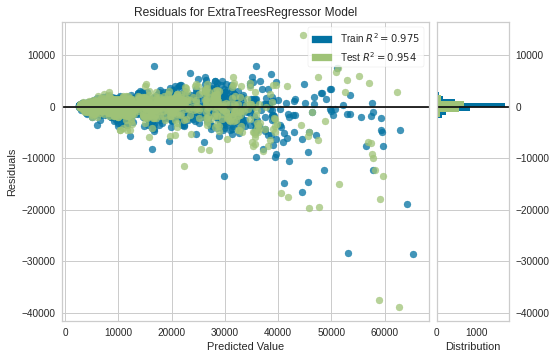

In [11]:
plot_model(tuned_et)

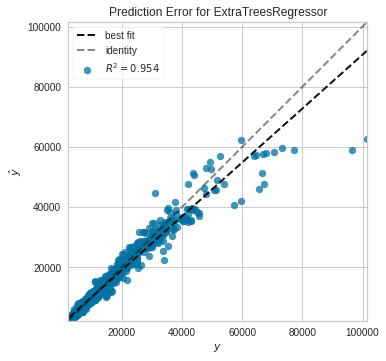

In [12]:
plot_model(tuned_et, plot= 'error')

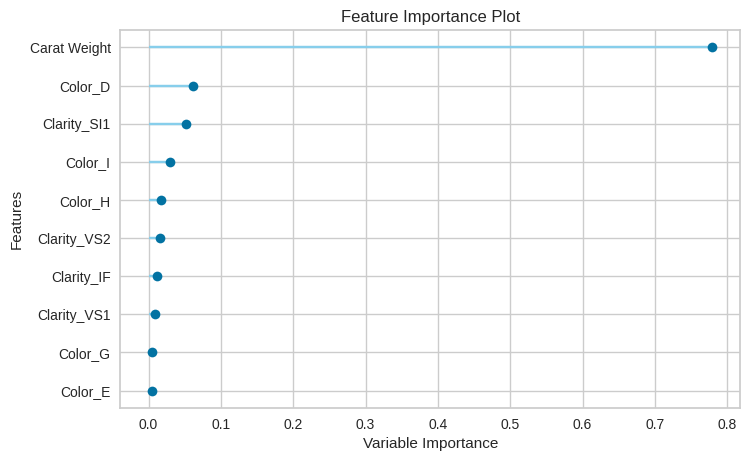

In [13]:
plot_model(tuned_et, plot= 'feature')

In [14]:
evaluate_model(tuned_et)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [15]:
final_et = finalize_model(tuned_et)
print(final_et)

ExtraTreesRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse', max_depth=9,
                    max_features=1.0, max_leaf_nodes=None, max_samples=None,
                    min_impurity_decrease=0.1, min_impurity_split=None,
                    min_samples_leaf=4, min_samples_split=7,
                    min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                    oob_score=False, random_state=123, verbose=0,
                    warm_start=False)
